In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from prophet import Prophet
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
df = pd.read_csv('/content/BASE.csv', sep=';')

In [74]:
df.head()

,Data,Preço
0,20/05/1987,"18,63"
1,21/05/1987,"18,45"
2,22/05/1987,"18,55"
3,25/05/1987,"18,6"
4,26/05/1987,"18,63"


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11300 entries, 0 to 11299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    11298 non-null  object
 1   Preço   11298 non-null  object
dtypes: object(2)
memory usage: 176.7+ KB


In [76]:
df.shape

(11300, 2)

In [77]:
df.isnull().sum()

,0
Data,2
Preço,2


In [78]:
df_limpo = df.dropna(inplace=True)

In [79]:
df.describe().round(2)

,Data,Preço
count,11298,11298
unique,11298,5306
top,20/05/1987,"18,48"
freq,1,26


In [80]:
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

<ipython-input-80-8a1c0cdcdff6>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'], errors='coerce')


In [81]:
df.head()

,Data,Preço
0,1987-05-20,"18,63"
1,1987-05-21,"18,45"
2,1987-05-22,"18,55"
3,1987-05-25,"18,6"
4,1987-05-26,"18,63"


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11298 entries, 0 to 11297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    11298 non-null  datetime64[ns]
 1   Preço   11298 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 264.8+ KB


In [83]:
df_prophet = df.rename(columns={'Data': 'ds', 'Preço': 'y'})

In [84]:
df_prophet.head()

,ds,y
0,1987-05-20,"18,63"
1,1987-05-21,"18,45"
2,1987-05-22,"18,55"
3,1987-05-25,"18,6"
4,1987-05-26,"18,63"


In [85]:
df_prophet.sort_index(ascending=True, inplace=True)
df_prophet.head()

,ds,y
0,1987-05-20,"18,63"
1,1987-05-21,"18,45"
2,1987-05-22,"18,55"
3,1987-05-25,"18,6"
4,1987-05-26,"18,63"


In [86]:
holiday = pd.DataFrame({'holiday': 'Eventos',
                        'ds': pd.to_datetime(["2008-09-15","2020-03-11","2022-02-24"]),
                        'lower_window': 0,
                        'upper_window': 1,
                        })

In [87]:
holiday.head()

,holiday,ds,lower_window,upper_window
0,Eventos,2008-09-15,0,1
1,Eventos,2020-03-11,0,1
2,Eventos,2022-02-24,0,1


In [88]:
df_prophet['y'] = df_prophet['y'].str.replace(',', '.').astype(float)

In [89]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11298 entries, 0 to 11297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      11298 non-null  datetime64[ns]
 1   y       11298 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 264.8 KB


In [90]:
df_prophet.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


Modelo


In [91]:
model = Prophet()

In [92]:
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn4u45nwz/ivhk_2es.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn4u45nwz/7o3yuxrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1471', 'data', 'file=/tmp/tmpn4u45nwz/ivhk_2es.json', 'init=/tmp/tmpn4u45nwz/7o3yuxrh.json', 'output', 'file=/tmp/tmpn4u45nwz/prophet_modeljgkuscy5/prophet_model-20241128201147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:11:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:11:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [93]:
future = model.make_future_dataframe(periods=365)

In [94]:
forecast = model.predict(future)

In [95]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

              ds       yhat  yhat_lower  yhat_upper
11658 2025-11-08  93.736533   78.310131  109.034713
11659 2025-11-09  93.156405   78.926574  107.917189
11660 2025-11-10  93.389304   78.506447  108.083684
11661 2025-11-11  93.275923   78.317226  108.244427
11662 2025-11-12  93.211783   77.832688  108.635616


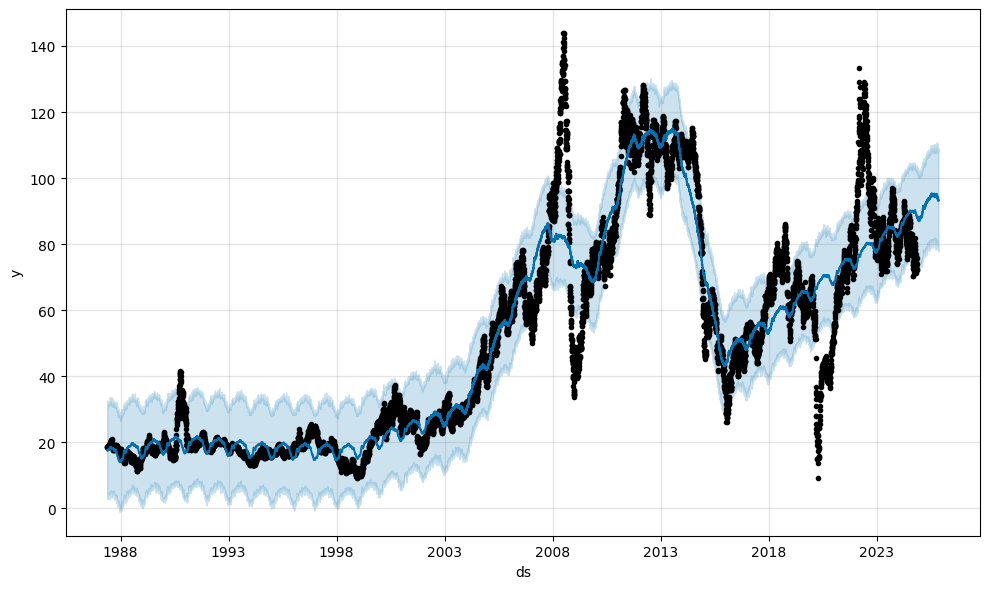

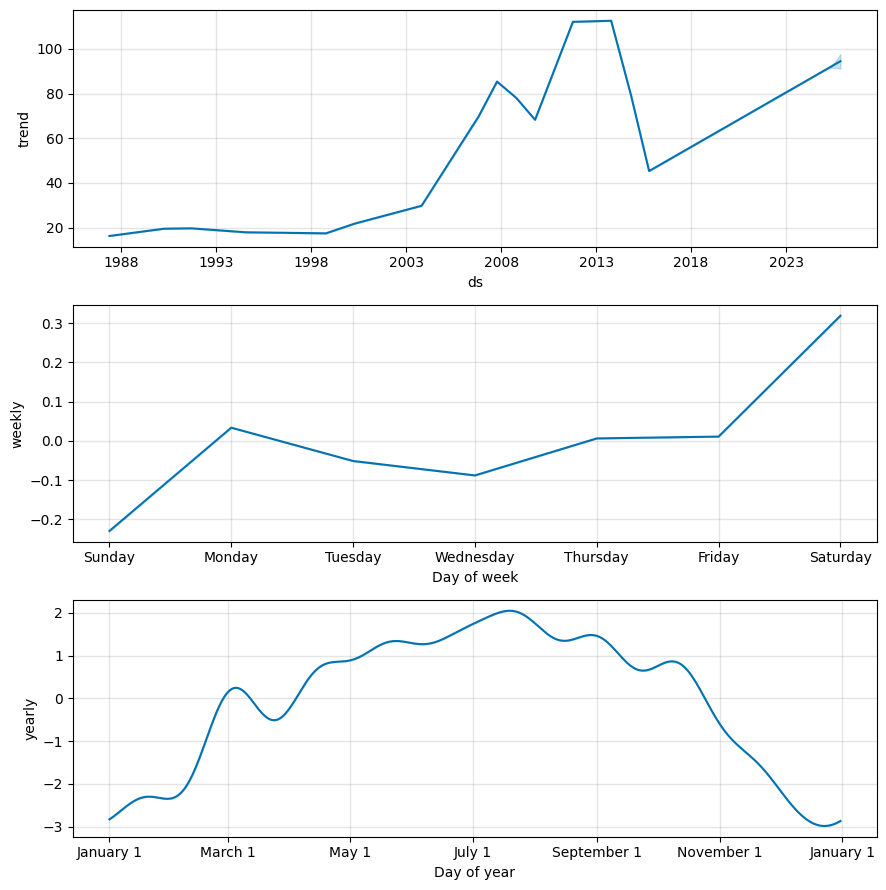

In [96]:
fig = model.plot(forecast)

fig = model.plot_components(forecast)

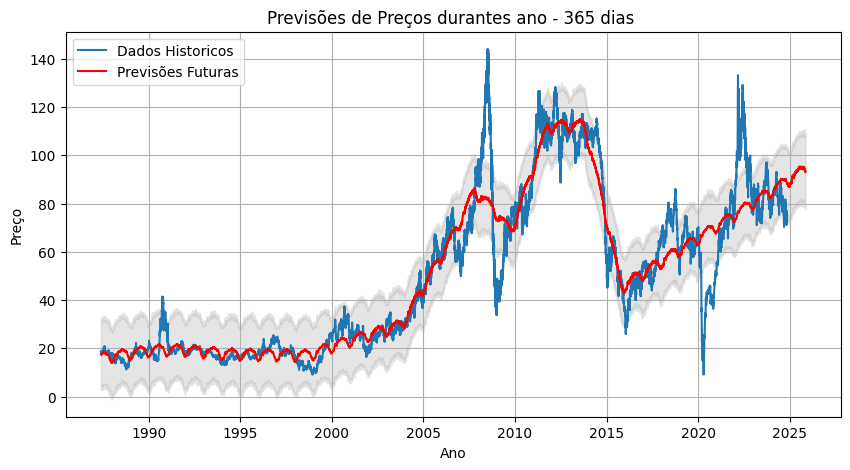

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Dados Historicos')
plt.plot(forecast['ds'], forecast['yhat'], label='Previsões Futuras', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Previsões de Preços durantes ano - 365 dias ')
plt.legend()
plt.grid(True)
plt.show()

Avaliação


In [98]:
print(len(df_prophet['y']))  # Tamanho dos dados reais
print(len(forecast['yhat']))  # Tamanho das previsões


11298
11663


In [99]:
print(df_prophet.index)
print(forecast.index)


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       11288, 11289, 11290, 11291, 11292, 11293, 11294, 11295, 11296, 11297],
      dtype='int64', length=11298)
RangeIndex(start=0, stop=11663, step=1)


In [100]:
print(forecast.head())  # Visualize as primeiras linhas de forecast
print(forecast.tail())  # E também as últimas

          ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1987-05-20  16.287079    4.291799   31.648561    16.287079    16.287079   
1 1987-05-21  16.290212    2.861523   31.837374    16.290212    16.290212   
2 1987-05-22  16.293346    3.486223   32.231673    16.293346    16.293346   
3 1987-05-25  16.302746    3.111615   30.978663    16.302746    16.302746   
4 1987-05-26  16.305879    4.652492   31.810600    16.305879    16.305879   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        1.226174              1.226174              1.226174 -0.088069   
1        1.331533              1.331533              1.331533  0.006157   
2        1.344204              1.344204              1.344204  0.010792   
3        1.373559              1.373559              1.373559  0.033505   
4        1.285836              1.285836              1.285836 -0.051350   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.088069

In [101]:
aligned = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

In [102]:
print(len(aligned))
print(aligned.columns)

11298
Index(['ds', 'y', 'yhat'], dtype='object')


In [103]:
mae = np.mean(np.abs(aligned['y'] - aligned['yhat']))
mse = np.sqrt(mean_squared_error(aligned['y'], aligned['yhat']))

print("MAE:", mae)
print("RMSE:", mse)

MAE: 6.937320344627308
RMSE: 10.87741017444013


In [104]:
from sklearn.metrics import r2_score

r2 = r2_score(aligned['y'], aligned['yhat'])
print("R²:", r2)

R²: 0.8923850867146986


In [105]:
mae = mean_absolute_error(aligned['y'], aligned['yhat'])
print("MAE:", mae)

# Cálculo do MSE
mse = mean_squared_error(aligned['y'], aligned['yhat'])
print("MSE:", mse)

# Cálculo do RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Cálculo do R²
r2 = r2_score(aligned['y'], aligned['yhat'])
print("R²:", r2)

MAE: 6.937320344627308
MSE: 118.31805210301364
RMSE: 10.87741017444013
R²: 0.8923850867146986


In [106]:
df_prophet_ = df.rename(columns={'Data': 'ds', 'Preço': 'y'})
df_prophet_['y'] = df_prophet['y'].astype(float)
df_prophet_

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
11293,2024-11-06,76.52
11294,2024-11-07,75.73
11295,2024-11-08,74.04
11296,2024-11-11,72.19


In [107]:
# Divisão dos Dados em Treino e Teste com uma data de corte
cut_date = '2023-12-31'

# Dados de treino
train_df = df_prophet_[df_prophet_['ds'] <= cut_date]
train_df.head()
# Dados de teste
test_df = df_prophet_[df_prophet_['ds'] > cut_date]

In [108]:
print("Treino:", train_df.shape)
print("Teste:", test_df.shape)

Treino: (11077, 2)
Teste: (221, 2)


In [109]:
train_df

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
11072,2023-12-22,80.23
11073,2023-12-26,80.23
11074,2023-12-27,80.97
11075,2023-12-28,79.04


In [110]:
test_df

,ds,y
11077,2024-01-02,76.24
11078,2024-01-03,77.18
11079,2024-01-04,75.79
11080,2024-01-05,78.31
11081,2024-01-08,75.47
...,...,...
11293,2024-11-06,76.52
11294,2024-11-07,75.73
11295,2024-11-08,74.04
11296,2024-11-11,72.19


In [112]:
# Treinamento do Modelo Prophet
model2 = Prophet()
model2.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn4u45nwz/1yqacfrl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn4u45nwz/f6u7_nvu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70867', 'data', 'file=/tmp/tmpn4u45nwz/1yqacfrl.json', 'init=/tmp/tmpn4u45nwz/f6u7_nvu.json', 'output', 'file=/tmp/tmpn4u45nwz/prophet_model3mxduor0/prophet_model-20241128201200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:12:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [113]:
future = model2.make_future_dataframe(periods=len(test_df))

# Verificar o intervalo das datas futuras
print("Datas futuras geradas:")
print(future.tail())

Datas futuras geradas:
              ds
11293 2024-08-02
11294 2024-08-03
11295 2024-08-04
11296 2024-08-05
11297 2024-08-06


In [114]:
# Garantir que as datas futuras estão dentro do intervalo esperado
future['ds'].max() > pd.to_datetime('2026-01-01')

In [115]:
forecast2 = model.predict(future)

In [116]:
forecast_test = forecast2[forecast2['ds'] > cut_date]
print(forecast_test['ds'])


Datas previstas após a data de corte:
11079   2024-01-01
11080   2024-01-02
11081   2024-01-03
11082   2024-01-04
11083   2024-01-05
           ...    
11293   2024-08-02
11294   2024-08-03
11295   2024-08-04
11296   2024-08-05
11297   2024-08-06
Name: ds, Length: 219, dtype: datetime64[ns]


In [117]:
merged = test_df.merge(forecast_test[['ds', 'yhat']], on='ds')

In [118]:
merged.head()

,ds,y,yhat
0,2024-01-02,76.24,82.527301
1,2024-01-03,77.18,82.536764
2,2024-01-04,75.79,82.679101
3,2024-01-05,78.31,82.733372
4,2024-01-08,75.47,82.909634


In [120]:
mae = np.mean(np.abs(merged['y'] - merged['yhat']))
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
mean_test_value = test_df['y'].mean()

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Value of Test Dataset: {mean_test_value}')

Mean Absolute Error (MAE): 3.961604658334153
Root Mean Squared Error (RMSE): 5.1841789363942254
Mean Value of Test Dataset: 81.49615384615386


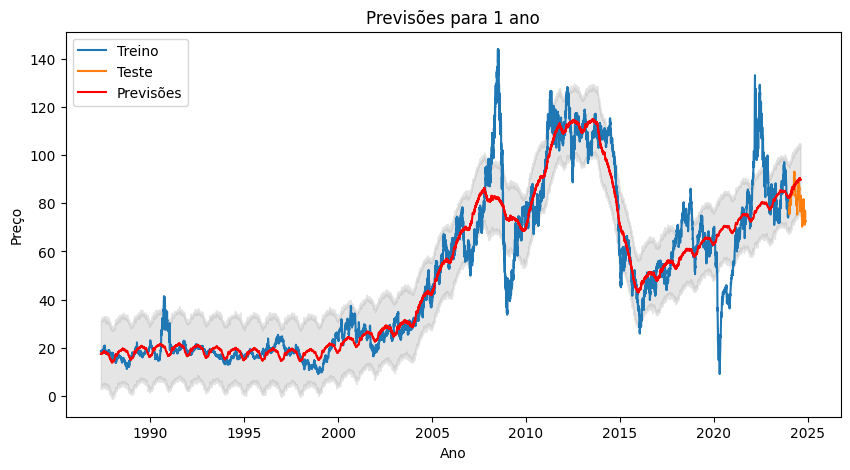

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(train_df['ds'], train_df['y'], label='Treino')
plt.plot(test_df['ds'], test_df['y'], label='Teste')
plt.plot(forecast2['ds'], forecast2['yhat'], label='Previsões', color='red')
plt.fill_between(forecast2['ds'], forecast2['yhat_lower'], forecast2['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Previsões para 1 ano')
plt.legend()
plt.show()

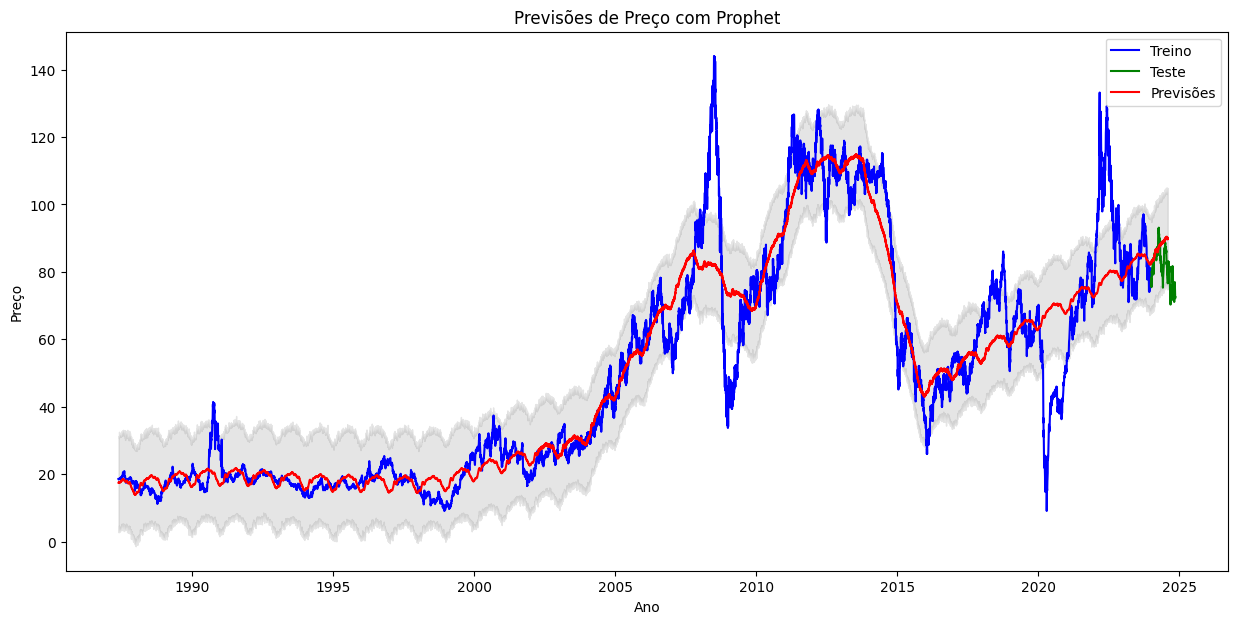

In [122]:
plt.figure(figsize=(15, 7))
plt.plot(train_df['ds'], train_df['y'], label='Treino', color='blue')
plt.plot(test_df['ds'], test_df['y'], label='Teste', color='green')
plt.plot(forecast2['ds'], forecast2['yhat'], label='Previsões', color='red')
plt.fill_between(forecast2['ds'], forecast2['yhat_lower'], forecast2['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Previsões de Preço com Prophet')
plt.legend()
plt.show()

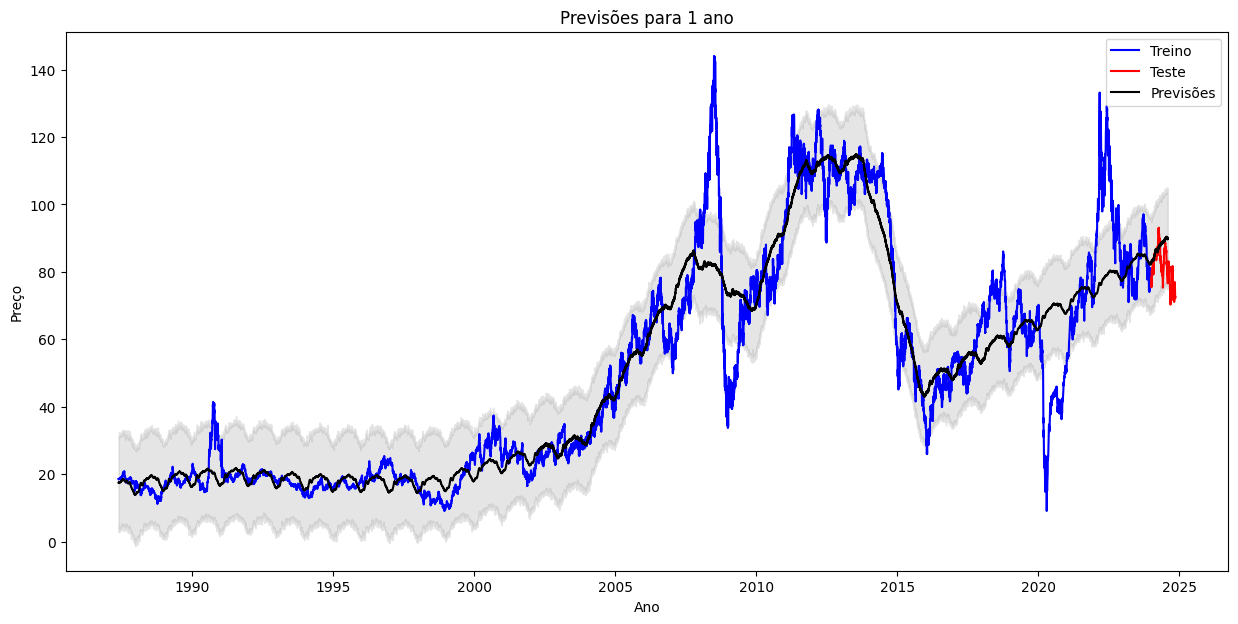

In [123]:
plt.figure(figsize=(15, 7))

# Plotar os dados de treino e teste
plt.plot(train_df['ds'], train_df['y'], label='Treino', color='blue', linestyle='-')
plt.plot(test_df['ds'], test_df['y'], label='Teste', color='red', linestyle='-')

# Plotar as previsões
plt.plot(forecast2['ds'], forecast2['yhat'], label='Previsões', color='black', linestyle='-')

# Adicionar intervalo de confiança
plt.fill_between(forecast2['ds'], forecast2['yhat_lower'], forecast2['yhat_upper'], color='gray', alpha=0.2)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Previsões para 1 ano')
plt.legend()
plt.show()

In [124]:
forecast_tail = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print(forecast_tail)

              ds       yhat  yhat_lower  yhat_upper
11293 2024-08-02  89.950248   76.379614  104.114665
11294 2024-08-03  90.229217   75.097941  103.940046
11295 2024-08-04  89.653042   76.189110  104.767982
11296 2024-08-05  89.889007   76.460910  103.410583
11297 2024-08-06  89.778915   75.352265  102.405072


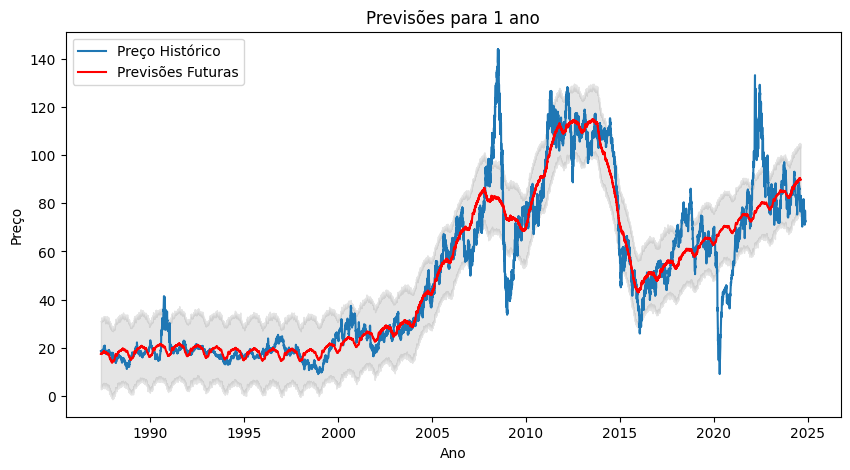

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(df_prophet_['ds'], df_prophet_['y'], label='Preço Histórico')
plt.plot(forecast2['ds'], forecast2['yhat'], label='Previsões Futuras', color='red')
plt.fill_between(forecast2['ds'], forecast2['yhat_lower'], forecast2['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Previsões para 1 ano')
plt.legend()
plt.show()